## **Deteksi Penyakit Malaria Pada Citra Sel Darah Menggunakan CNN (Convolutional Neural Network)**



---


By: Indah Yunita

Email: indahyun77@gmail.com

github: inyunita

Medium: [indahyun.medium.com](https://indahyun.medium.com)


In [ ]:
#Library
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

#Library Tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# 1. Dataset

Ambil Data Menggunakan Kaggle Credential

In [ ]:
_ = ! git clone https://github.com/inyunita/kaggle_credential_indah # get credential from kaggle
_ = ! pip install kaggle # install kaggle on drevice
_ = ! mkdir ~/.kaggle # make hidden folder .kaggle to configure credential
_ = ! cp kaggle_credential_indah/kaggle.json ~/.kaggle/ # copy credential from github to .kaggle folder
_ = ! chmod 600 ~/.kaggle/kaggle.json # change access
_ = ! kaggle datasets download malaria-cell-images-dataset # which dataset to download
_ = ! unzip malaria-cell-images-dataset  # unzip if data zipped

Direktori Data

In [ ]:
cell_dir = '/content/cell_images/cell_images/'
uninfected_dir = cell_dir + 'Uninfected'
parasitized_dir = cell_dir + 'Parasitized'

#Jumlah data masing-masing kelas
print('Jumlah data uninfected :',len(os.listdir(uninfected_dir)))
print('Jumlah data parasitized :',len(os.listdir(parasitized_dir)))

Jumlah data uninfected : 13780
Jumlah data parasitized : 13780


# 2. Preprocessing

In [ ]:
#inisialisasi ukuran citra
width = 128
height = 128
channel= 3

#melihat jumlah kelas
cell_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  cell_dir,
  image_size=(width, height)
  )
# melihat nama kelas
class_names = cell_dataset.class_names
print(class_names)

Found 27558 files belonging to 2 classes.
['Parasitized', 'Uninfected']


# 3. Menampilkan Sample Data

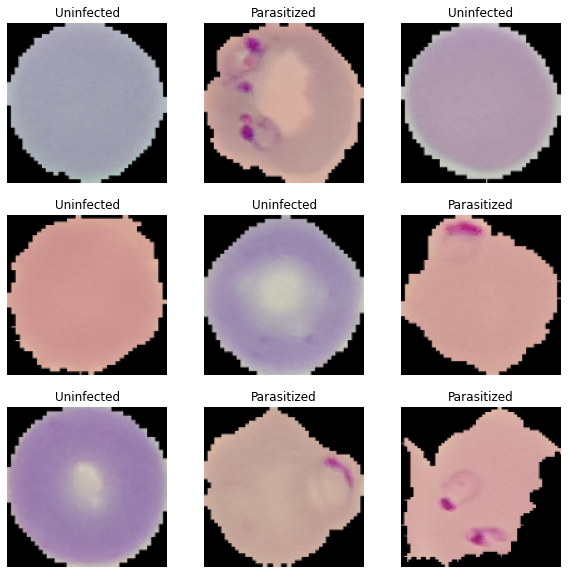

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in cell_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# 4. Pembagian Dataset

Normalisasi Data dan Mengambil 20% Data Test

In [ ]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [ ]:
train_gen = datagen.flow_from_directory(directory = cell_dir,
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')
val_gen = datagen.flow_from_directory(directory = cell_dir,
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation'),

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


# 5. Membangun Model

In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(width,height,channel)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)        0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
class CallbackAcc(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.96):
            print("Akurasi Telah Mencapai %2.2f%% " %(logs.get('accuracy')*100))
            self.model.stop_training = True
callback = CallbackAcc()

# 6. Training Data

In [ ]:
history = model.fit(train_gen, 
                    epochs=50,
                    validation_data=val_gen,
                    verbose=1,
                    callbacks=[callback],
                    shuffle = False)

Epoch 1/50
1378/1378 [==============================] - 51s 30ms/step - loss: 0.4531 - accuracy: 0.7764 - val_loss: 0.1963 - val_accuracy: 0.9252
Epoch 2/50
1378/1378 [==============================] - 35s 25ms/step - loss: 0.1857 - accuracy: 0.9463 - val_loss: 0.1852 - val_accuracy: 0.9441
Epoch 3/50
1378/1378 [==============================] - 37s 27ms/step - loss: 0.1594 - accuracy: 0.9521 - val_loss: 0.1683 - val_accuracy: 0.9437
Epoch 4/50
1378/1378 [==============================] - 35s 25ms/step - loss: 0.1431 - accuracy: 0.9575 - val_loss: 0.1879 - val_accuracy: 0.9399
Epoch 5/50
1378/1378 [==============================] - 35s 25ms/step - loss: 0.1395 - accuracy: 0.9570 - val_loss: 0.1915 - val_accuracy: 0.9385
Epoch 6/50
1378/1378 [==============================] - 35s 25ms/step - loss: 0.1330 - accuracy: 0.9581 - val_loss: 0.1740 - val_accuracy: 0.9479
Epoch 7/50
1378/1378 [==============================] - 36s 26ms/step - loss: 0.1247 - accuracy: 0.9601 - val_loss: 0.1837 -

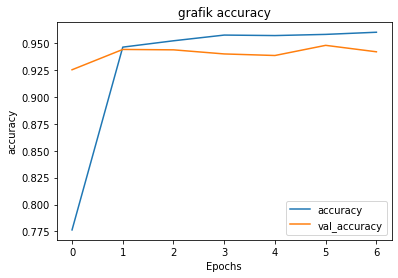

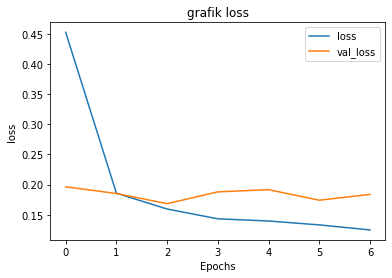

In [ ]:
import matplotlib.pyplot as plt
def grafik_plot(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.title('grafik '+string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
grafik_plot(history, "accuracy")
grafik_plot(history, "loss")

Saving Malaria Parasitized.png to Malaria Parasitized (3).png
1/1 [==============================] - 0s 128ms/step
Malaria Parasitized.png
[[0.]]
Parasitized


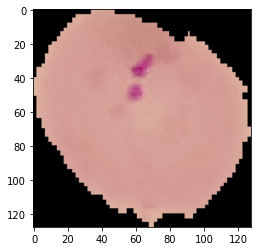

In [30]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded_files = files.upload()
 
for pic in uploaded_files.keys():
  path = pic
  img = load_img(path, target_size=(width,height))
  imgplot = plt.imshow(img)
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(pic)
  print(classes)
  if classes==0:
   print('Parasitized')
  elif classes==1:
   print('Uninfected')